In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [80]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

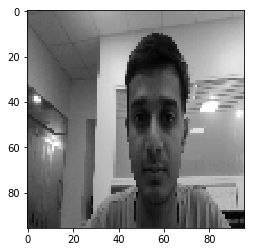

In [81]:
# we ll open image which we want to predict

imgSize = (96, 96)

img = Image.open('saransh_pic.jpg')
img = img.resize(imgSize)
img = img.convert('L')
plot = plt.imshow(img, cmap = 'gray')
plt.show()

In [104]:
path = os.path.abspath('face_keypoint_trained')
modelPath = os.path.join(path, 'CNN_face_keypoint2000.h5')
model = load_model(modelPath)

In [105]:
# loading test data to predict on

testPath = '/home/saransh/Desktop/keras/face_keypoint_dataset/test.csv'
dfTest = pd.read_csv(testPath)

In [106]:
dfTest['Image'] = dfTest['Image'].apply(lambda img: np.fromstring(img, sep = ' ', dtype = np.float32))
dfTest = dfTest.dropna()
#dfTest.count()
dfTest['Image']

0       [182.0, 183.0, 182.0, 182.0, 180.0, 180.0, 176...
1       [76.0, 87.0, 81.0, 72.0, 65.0, 59.0, 64.0, 76....
2       [177.0, 176.0, 174.0, 170.0, 169.0, 169.0, 168...
3       [176.0, 174.0, 174.0, 175.0, 174.0, 174.0, 176...
4       [50.0, 47.0, 44.0, 101.0, 144.0, 149.0, 120.0,...
5       [177.0, 177.0, 177.0, 171.0, 142.0, 115.0, 97....
6       [77.0, 55.0, 44.0, 56.0, 58.0, 61.0, 67.0, 66....
7       [156.0, 160.0, 162.0, 166.0, 150.0, 114.0, 97....
8       [230.0, 230.0, 231.0, 231.0, 231.0, 231.0, 231...
9       [132.0, 129.0, 126.0, 128.0, 146.0, 163.0, 170...
10      [182.0, 182.0, 182.0, 182.0, 182.0, 181.0, 183...
11      [207.0, 205.0, 204.0, 202.0, 205.0, 197.0, 184...
12      [121.0, 83.0, 58.0, 41.0, 37.0, 36.0, 33.0, 33...
13      [89.0, 60.0, 63.0, 65.0, 65.0, 84.0, 64.0, 35....
14      [88.0, 112.0, 132.0, 132.0, 133.0, 135.0, 131....
15      [153.0, 153.0, 155.0, 156.0, 155.0, 154.0, 153...
16      [97.0, 101.0, 98.0, 92.0, 91.0, 91.0, 95.0, 99...
17      [253.0

In [107]:
xT = np.vstack(dfTest['Image'])
# this will vertically join the image column
# this will give (2140, 9216) as 96*96 = 9216
xT = xT / 255 # normalization
xT.shape
# here we see we have 1783 images for test

# now similarly we ll reshape
xTest = []

for image in xT:
    imgMat = image.reshape(96, 96, 1)
    xTest.append(imgMat)
xTest = np.array(xTest)
xTest.shape

(1783, 96, 96, 1)

In [85]:
xT = np.vstack(dfTest['Image'].iloc[1:3])
# this will vertically join the image column
# this will give (2140, 9216) as 96*96 = 9216
xT = xT / 255 # normalization
xT.shape
# here we see we have 1783 images for test

# now similarly we ll reshape
xTest = []

for image in xT:
    imgMat = image.reshape(96, 96, 1)
    xTest.append(imgMat)
img = np.array(img)
img = img.reshape(96, 96, 1)
xTest.append(img)
xTest = np.array(xTest)
xTest.shape

(3, 96, 96, 1)

In [108]:
sample = xTest
predict = model.predict(xTest)

In [146]:
number = 369
samplePredict = predict[number]
print(samplePredict * 48 + 48)

[ 66.07455444  36.77997589  29.48656654  37.16204453  59.15109253
  37.90202332  73.49263     37.59984207  36.48207855  38.00143433
  22.11026764  38.14602661  55.99011612  29.31443405  79.65586853
  29.50234222  39.32080841  29.61790657  15.57249451  30.72086906
  48.15742111  57.46614838  63.45488739  75.87349701  33.08215332
  76.20100403  48.1695137   72.75885773  48.24238968  82.68359375]


In [144]:
xCord = []
yCord = []
for i in range(0, len(samplePredict), 2):
    xCord.append(samplePredict[i]*48 + 48)
    yCord.append(samplePredict[i+1]*48 + 48)

[66.074551105499268, 29.486566543579102, 59.151093721389771, 73.492632865905762, 36.48207950592041, 22.110268592834473, 55.990116119384766, 79.655865669250488, 39.320807218551636, 15.57249641418457, 48.157421641051769, 63.454888343811035, 33.082151412963867, 48.169514022767544, 48.242391049861908]


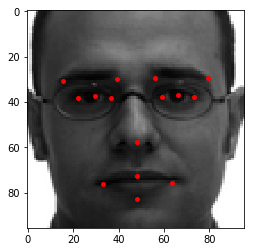

In [147]:
imPlot = sample[number].reshape(96, 96)
plt.imshow(imPlot, cmap = 'gray')
plt.scatter(xCord, yCord, s = 15, c ='r')
print(xCord)
plt.show()